# EDA on Student Habits and Performance Dataset


## 1. Understand the Dataset
- **Objective**: Explore how students' daily habits (e.g., study hours, screen time, sleep, mental health, etc.) affect their academic performance.
- **Target variable**: `exam_score`
- **Dataset size**: 1000 entries, 16 columns


In [1]:

import pandas as pd

# Load data
df = pd.read_csv("student_habits_performance.csv")
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4



## 2. Data Cleaning
Check for missing values, duplicates, and data types.


In [3]:

# Missing values
print("Missing values:\n", df.isnull().sum())

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Data types
df.dtypes


Missing values:
 student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Duplicate rows: 0


student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


## 3. Descriptive Statistics
Get an overview of the numerical and categorical data.


In [5]:

df.describe(include='all')


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,909,1000,1000.000000,1000,1000.000000
unique,1000,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1000,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,392,447,NaN,682,NaN
mean,NaN,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500
std,NaN,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564
min,NaN,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000
50%,NaN,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000
75%,NaN,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000



## 4. Correlation Analysis
Check relationships between numeric features and with the target `exam_score`.


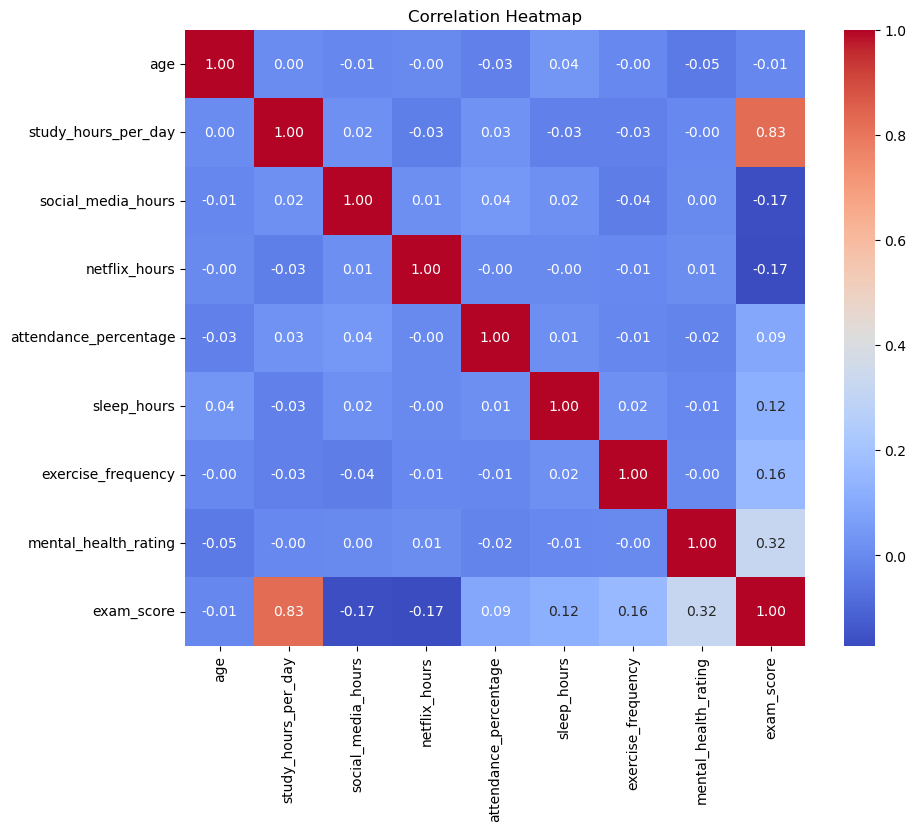

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



**Findings**:
- `study_hours_per_day` has the strongest positive correlation with `exam_score` (0.83).
- `social_media_hours` and `netflix_hours` are negatively correlated with `exam_score`.
- Mental health and exercise show positive influence on performance.



## 5. Univariate Analysis
Distribution of individual features.


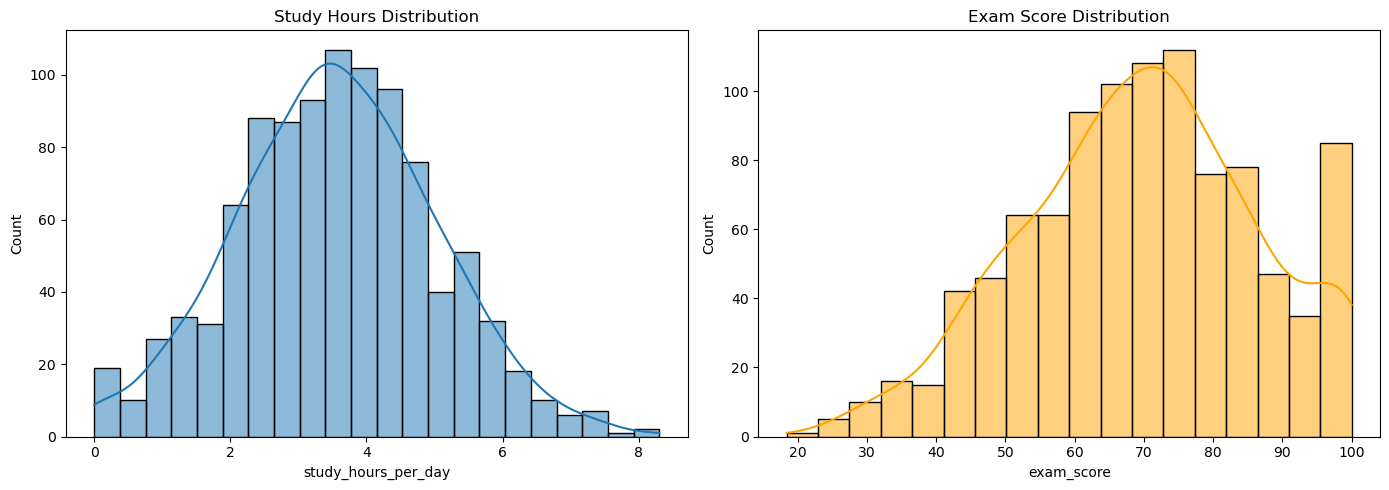

In [9]:

# Numerical: Study hours, exam score
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['study_hours_per_day'], kde=True, ax=ax[0])
ax[0].set_title("Study Hours Distribution")

sns.histplot(df['exam_score'], kde=True, ax=ax[1], color="orange")
ax[1].set_title("Exam Score Distribution")
plt.tight_layout()
plt.show()



## 6. Bivariate Analysis
Explore relationship between exam score and other variables.


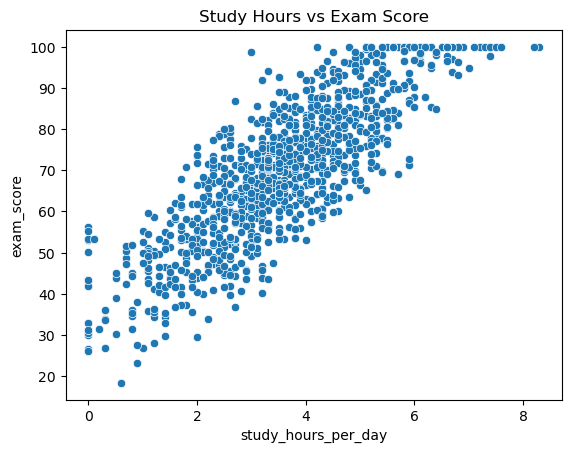

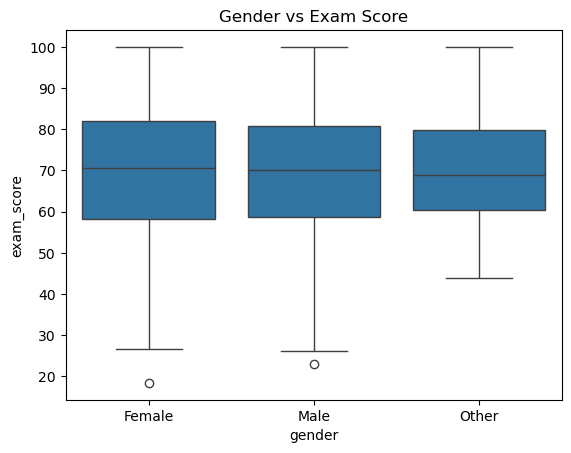

In [11]:

# Study hours vs Exam score
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title("Study Hours vs Exam Score")
plt.show()

# Boxplot: Gender vs Exam score
sns.boxplot(x='gender', y='exam_score', data=df)
plt.title("Gender vs Exam Score")
plt.show()



## 7. Categorical Influence


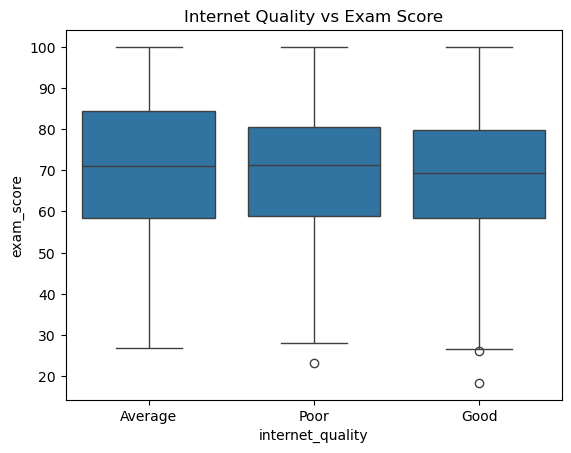

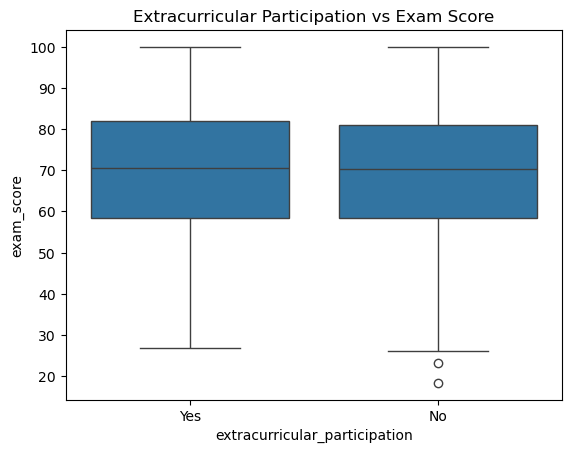

In [13]:

# Internet quality vs exam score
sns.boxplot(x='internet_quality', y='exam_score', data=df)
plt.title("Internet Quality vs Exam Score")
plt.show()

# Extracurricular vs exam score
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df)
plt.title("Extracurricular Participation vs Exam Score")
plt.show()



## 8. Summary of Findings
- Students who study more hours tend to score better.
- High social media and Netflix usage slightly reduce exam performance.
- Good mental health and frequent exercise are linked to better scores.
- Factors like internet quality and extracurricular activities also play roles in academic performance.
